
# PROYECTO FINAL
Gutierrez Castulo Naomy Rachel

In [ ]:
using Plots

 **Modelo de Hodgkin-Huxley** 

Ejercicio 1

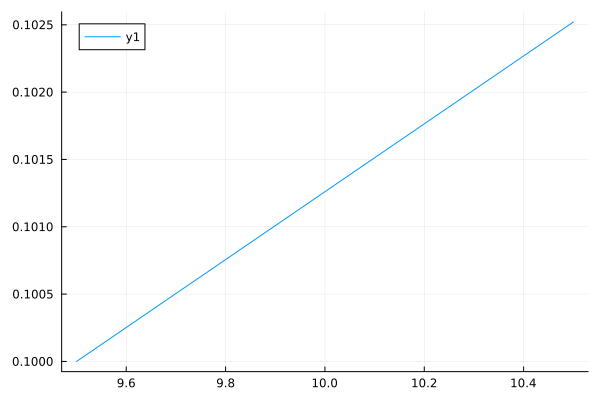

In [101]:
function alpha_n(V)  #Definimos la funcion que nos piden. 
    
      #Primero vamos a definir la funcion alpha_n relacionada 
#con la formula an usando la regla de regla de L'Hopital, esto con cualquier valor en v.
    
    alpha = 0.01(10-V)/(exp((10 - V)/10)-1)
      
      #Abrimos un ciclo if para colocar que pasa si V - 10 < ε=0.0001 
    if V - 10 < 0.000001  # Aqui estamos poniendo que cuando V-10 sea menor que
                        #la constante que colocamos, tiene que colocarnos el 
                        # valor como si V fuera 10, eso para observar 
                        #como lo observamos en esta parte ya que si cambiamos 
                        # este V acercandolo a cero y teniendo menos 10 el valor 
                        #va estar por el mismo valor que v=10.
        return 0.1
        
    else 
        return alpha
    end
         
    
        
end


plot(alpha_n, 9.5:10.5)

Ejercicio 2

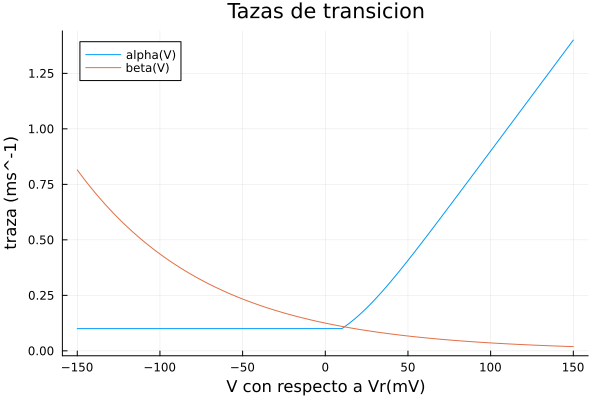

In [102]:
function beta_n(V) #Definimos la funcion que se nos solicita.
   
    # Tenemos que definir la funcion beta_n para esto solo se define la
#igualdad con la ecuacion de Bn(v) que esta en la teoria del proyecto.
    
 0.125 * ℯ^(-V/80)
    
end


function plotalpha()   #por ultimo creamos la funcion para poder imprimir 
                        #las dos funciones que hemos establecido.
    V = -150:150
    alpha = alpha_n.(V)
    beta = beta_n.(V)


plot(V, alpha, title="Tazas de transicion", xlabel="V con respecto a Vr(mV)", ylabel="traza (ms^-1)", label="alpha(V)")
plot!(V,beta, label="beta(V)")
end

plotalpha()

#NOTA:Los caracteres de latex y lo relacionado con "L"en mi computadora no se ejecuta por eso lo dejo asi.


Ejercio 3

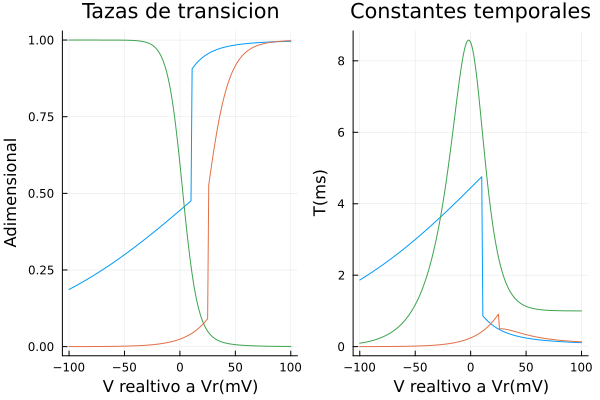

In [90]:
## Dadas alfa y beta, calcular ahora y graficar n y tau para ambos canales.

## Agrega las funciones correspondientes para la compuerta de sodio también,
## deduce sus definiciones a partir de las llamadas en la función para graficar

function alpha_m(V)  #Como dice el la instruccion solo definimos las funciones 
                     #correspondientes
alpha =  (0.1*(25-V))/(ℯ^((25-V)/10)-1)
    if (V-25) <  0.00001   #Ocupamos la ecuacion de 25 que se nos presenta en el notebook.
        return 0.1
        
    else 
        return alpha
    end
end


function beta_m(V)
    
  b_m = 4*ℯ^-(V/18)
    return b_m
    
end


function alpha_h(V)
    
    a_h= 0.07*(exp(-V/20))  #coloco diferente la forma del exponente 
                             #devido a que por el acomodo me marca mensajes de error.
    return a_h
    
end


function beta_h(V)
    b_h= 1/(ℯ^((30-V)/10)+1)
    return b_h
    
end


function tau_inf(alpha, beta)
   t_inf = 1 ./(alpha .+ beta)   #Dependiendo de los valores de a y b se
    
                                  #se va a tender a infinito.
    return t_inf
    
    
end


function n_inf(alpha, beta)         #Ocupando el valo de alfa se va a intuir n que de igual forma manda a infinito.
    n= alpha ./ (alpha .+ beta)
    return n
end


function plotParameters()
    V = -100 :  100 
    
a_n = alpha_n.(V)  #Aqui anotamos las funciones que se van a considerar.
b_n = beta_n.(V)

a_m = alpha_m.(V)
b_m = beta_m.(V)

a_h = alpha_h.(V)
b_h = beta_h.(V)

    
    n_8_n =  n_inf(a_n, b_n)
    t_8_n = tau_inf(a_n, b_n)
    
    n_8_m = n_inf(a_m, b_m)
    t_8_m = tau_inf(a_m, b_m)
    
    n_8_h = n_inf(a_h, b_h)
    t_8_h = tau_inf(a_h, b_h)
    
     #Debido a que el codigo puesto en el note book para imprimir me marca que es una salida no valida indepeniente de 
    # como lo modifique, cambie esta parte, deciniendo p1 y p2.
    
p1= plot(V, [n_8_n n_8_m n_8_h], title= "Tazas de transicion",label= false,ylabel= "Adimensional", xlabel= "V realtivo a Vr(mV)")
p2 = plot(V,[t_8_n t_8_m t_8_h], title= "Constantes temporales" ,label = false, xlabel= "V realtivo a Vr(mV)", ylabel= "T(ms)")
   plot!(p1, p2) 
end

plotParameters()
     

  **COMENTARIO**
El metodo que se estudio hace referencia a potenciales como se observo hay un aumento en el voltaje y este desencadena una despolarizacion mayor de sodio y una repolarizacion en los canales de potacio,visualizando el flujo atraves de la membrana. 

**Simulación con el método numérico de Euler**

Ejercicios



In [144]:
function simulaHodkinHuxley(parametros, func) #Primero colocamos los parametros dentro de una funcion par definirlos y asi poder ocuparlos.
    DeltaT = parametros["DeltaT"]
    maxT = parametros["maxT"]
    V0 = parametros["V0"]
    gNa = parametros["gNa"]
    gK = parametros["gK"]
    gL = parametros["gL"]
    Cm = parametros["Cm"]
    ENa = parametros["ENa"]
    EK = parametros["EK"]
    EL = parametros["EL"]


function makeIext(t0=10.0, tfin=16.0, current=6.5) 
    function Iext(t)
        if (t > t0) && (t < tfin)
            return current  # micro A/cm2
        else
            return 0
        end
    end
    return Iext
end

#Ahora tenemos que implementar las ecuaciones del metodo de Hodgkin-Huxley.

  
    function a_inf(V)
        return 0.1(10-V)/(exp((10 - V)/10)-1)
    end

    function aM_inf(V)
        return (0.1*(25-V))/(ℯ^((25-V)/10)-1)
    end

    function b_inf(V)
        return 0.07*(exp(-V/20))
    end

        function tau_n(V)
        return 1 / 0.1(10-V)/(exp((10 - V)/10)-1) + 0.07*(exp(-V/20))
    end

    function tau_m(V)
        return 1 / 0.1(25-V)/(exp((25-V)/10)-1) + 0.07*(exp(-V/20))
    end

   function tau_h(V)
        return 1 / exp((V + 30) / 10) +0.07*(exp(-V/20) )

    end

    num_steps = Int(maxT / DeltaT) #Definimos la naturalesa de las variables que se usaran.
    t = zeros(num_steps)
    V = zeros(num_steps)
    G_Na = zeros(num_steps)
    G_K = zeros(num_steps)
    n = zeros(num_steps)
    m = zeros(num_steps)
    h = zeros(num_steps)
    I_ext = zeros(num_steps)

    t[1] = 0
    V[1] = V0
    n[1] = a_inf(V0)
    m[1] = aM_inf(V0)
    h[1] = h_inf(V0)
    G_Na[1] = gNa * m[1]^3 * h[1]
    G_K[1] = gK * n[1]^4
    I_ext[1] = func(t[1])

#nos tiene que regresar cada parametro
    return t, V, G_Na, G_K, n, m, h
end



simulaHodkinHuxley (generic function with 1 method)

In [180]:
function plotSimulation(t, V, G_Na, G_K, n, m, h) 
    p1 = plot(t, a_inf, xlabel="Tiempo (ms)", ylabel="Voltaje (mV)", title="Voltaje en la membrana")
    p2 = plot(t, b_inf, xlabel="Tiempo (ms)", ylabel="Conductancia (mS/cm^2)", title="Conductancia de los canales")
    p3 = plot(t, n, xlabel="Tiempo (ms)", ylabel="Conductancia (mS/cm^2)", title ="Tazas de transición")
    p4 = plot(t, tau_n, xlabel="Tiempo (ms)", ylabel="Tasa de transición", label="Constantes temporales")
    plot(p1, p2, p3, p4)

end

function sh(V0, t0, tfin, current) 
    func = makeIext(t0, tfin, current)
  
    plotSimulation(n)
    
end

sh(0.0, 10.0, 16.0, 5.0)



LoadError: MethodError: no method matching plotSimulation(::Vector{Float64})
[0mClosest candidates are:
[0m  plotSimulation(::Any, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m) at In[180]:1

**COMENTARIO** consegui que se graficaran las cuatro graficas pero se muestra al momentaneo ya que en un maximo de 50ms no se ve nada, pero si nosotros minimizamos este a 1 notamos una grafica cuadrda muy parecida en las cuatro por lo que quiere decir que los ajustes en las funciones este mal,por lo que cambi las formulas pero sigueapareciendo lo mismo, por lo que no puedo hacer un analisis respecto al caso que se estudia, pero si una reflexion de lo que hice. 

tambien ya no me grafico el voltaje de membrana y despues de demaciados intentos y pruebas dejo de imprimirse las graficas. 